In [1]:
import torch
import math
from torch import Tensor
import matplotlib.pyplot as plt 
# imports from this same folder
import loadData
import baseline
import optim
import modules

In [2]:
print('Pytorch version: ',torch.__version__)

Pytorch version:  0.3.1.post2


#samples:        torch.Size([1000, 2])
Are the classes balanced?
#true_samples:   torch.Size([483, 2])
#false_samples:  torch.Size([517, 2])


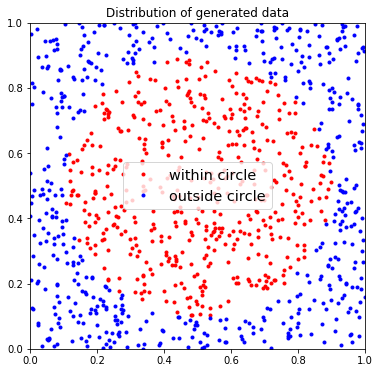

Baseline accuracy: 99.6 %
Targets converted to one-hot


In [3]:
# Generate data with target 0 if outside the circle or 1 if inside
train_input, train_target = loadData.generate_disc_set(1000)
test_input, test_target = loadData.generate_disc_set(1000)

# see if data are close to be balanced and plot the dataset
loadData.plot_data(train_input, train_target, show_plot = True)

# check what accuracy we could expect with a simple baseline
# e.g. with a linear classifier after having added the L2 norm of the points
baseline.baseline_linear_model(train_input,train_target,test_input,test_target)

# convert targets to one-hot encoding
train_target = loadData.convert_to_one_hot(train_target)
test_target  = loadData.convert_to_one_hot(test_target)
print('Targets converted to one-hot')

# Normalize inplace the data
loadData.normalize_data(train_input)
loadData.normalize_data(test_input)

    

In [4]:
train_target


    1     0
    0     1
    1     0
     ⋮      
    0     1
    1     0
    0     1
[torch.FloatTensor of size 1000x2]

In [9]:
Lin1 = modules.Linear(2,25)
Lin2 = modules.Linear(25,25)
Lin3 = modules.Linear(25,2)
act1 = modules.ReLU()
act2 = modules.ReLU()
act3 = modules.Tanh()
act4 = modules.Sigmoid()
layers = [
    Lin1,
    act1,
    Lin2,
    act2,
    Lin3,
    act3,
    act4]
#loss = LossBCE()
loss = modules.LossMSE()
model = modules.Sequential(layers, loss)
optimizer = optim.SGDOptimizer(model, 0.02)

#optimizer = optim.BFGSOptimizer(model, 2)

In [10]:
loss_list = []
train_acc = []

for epoch in range(100):
    
    print("\n Epoch", epoch)
    
    batch_size = 50
    train_loss = 0
    train_accuracy = 0
    
    model.zero_grad()
    
    for b in range(0, train_input.size()[0], batch_size):
        output = model.forward(train_input[b:b+batch_size,:])
        batch_loss = loss.forward(output, train_target[b:b+batch_size,:])
        train_loss += batch_loss
        model.backward()
        optimizer.step()
        
        _, pred = torch.max(output,1)
        _, target = torch.max(train_target[b:b+batch_size],1)
        
        train_accuracy += torch.sum(pred==target)
        
    print("\nTraining accuracy : ", train_accuracy/train_target.size()[0])      
    print("\nTraining loss : ", train_loss)
    loss_list.append(train_loss)
    train_acc.append(train_accuracy)


 Epoch 0

Training accuracy :  0.517

Training loss :  101.86712741851807

 Epoch 1

Training accuracy :  0.522

Training loss :  101.53175926208496

 Epoch 2

Training accuracy :  0.523

Training loss :  101.53174018859863

 Epoch 3

Training accuracy :  0.531

Training loss :  101.45892858505249

 Epoch 4

Training accuracy :  0.526

Training loss :  101.56073379516602

 Epoch 5

Training accuracy :  0.52

Training loss :  101.68661260604858

 Epoch 6

Training accuracy :  0.523

Training loss :  101.53925132751465

 Epoch 7

Training accuracy :  0.523

Training loss :  101.5190052986145

 Epoch 8

Training accuracy :  0.526

Training loss :  101.4558277130127

 Epoch 9

Training accuracy :  0.533

Training loss :  101.44181776046753

 Epoch 10

Training accuracy :  0.525

Training loss :  101.52184343338013

 Epoch 11

Training accuracy :  0.529

Training loss :  101.40373039245605

 Epoch 12

Training accuracy :  0.533

Training loss :  101.47316598892212

 Epoch 13

Training accu

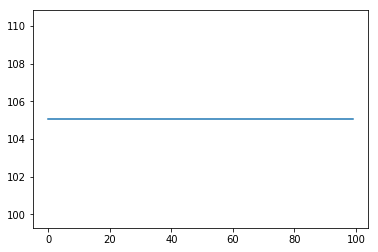

In [11]:
plt.figure(5)
plt.plot(loss_list)
plt.show()

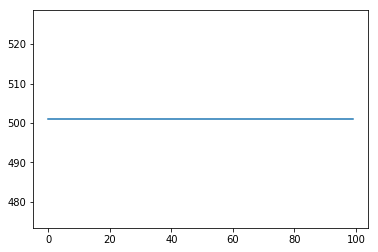

In [12]:
plt.plot(train_acc)
plt.show()

In [15]:
output = model.forward(test_input[:,:])
_, pred = torch.max(output,1)
_, target = torch.max(test_target,1)
        
test_accuracy = torch.sum(pred==target)
print (test_accuracy)

964


In [16]:
len(model.params)

3

In [17]:



param = model.params[1]
print (param[0][0].size())
print (param[1][0].size())
#.add_(- self.lr * param[1][0])

torch.Size([25, 25])
torch.Size([25, 25])


In [18]:
torch.zeros(param[0][0].size())



Columns 0 to 12 
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0    

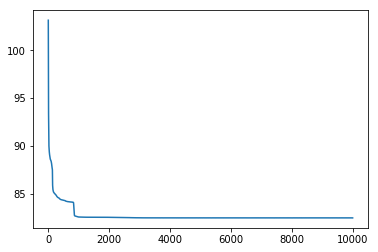

In [19]:
plt.plot(loss_list)
plt.show()

In [20]:
test_output = model.forward(test_input)
_, pred = torch.max(test_output,1)

torch.sum(pred == test_target.type(torch.LongTensor))

RuntimeError: inconsistent tensor size, expected r_ [1000], ta [1000] and tb [1000 x 2] to have the same number of elements, but got 1000, 1000 and 2000 elements respectively at /opt/conda/conda-bld/pytorch_1518243271935/work/torch/lib/TH/generic/THTensorMath.c:3051

In [ ]:
output = model.forward(train_input)
print(output)
train_loss = loss.forward(output,train_target)
print(train_loss)


In [ ]:
x = train_input
x = Lin1.forward(x)
x = act1.forward(x)
#x = Lin2.forward(x)
#x = act2.forward(x)
x = Lin3.forward(x)
x = act3.forward(x)
print(x)

In [ ]:
dx = loss.backward()
dx = act3.backward(dx)
dx = Lin3.backward(dx)
#dx = act2.backward(dx)
#dx = Lin2.backward(dx)
#dx = act1.backward(dx)
#dx = Lin1.backward(dx)
print(dx)

optim.step()

In [ ]:
model.reset_params()

In [ ]:
Lin3.dl_dw